In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hdbscan
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import normalize, StandardScaler

%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha': 0.5, 's': 80, 'linewidths': 0}

In [ ]:
HDBSCAN

In [4]:
test_data = pd.read_csv('Mall_Customers.csv', encoding='Latin-1') 
test_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
test_data = test_data.iloc[:,[3,4]].values

In [6]:
test_data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

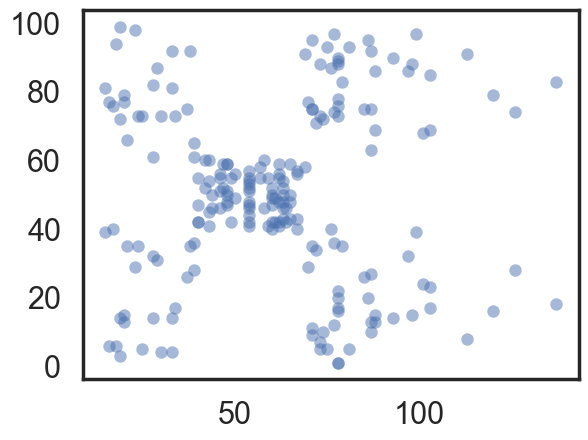

In [7]:
plt.scatter(test_data[:,0], test_data[:,1], color='b', **plot_kwds)

In [8]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True)
clusterer.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=3)

<Axes: >

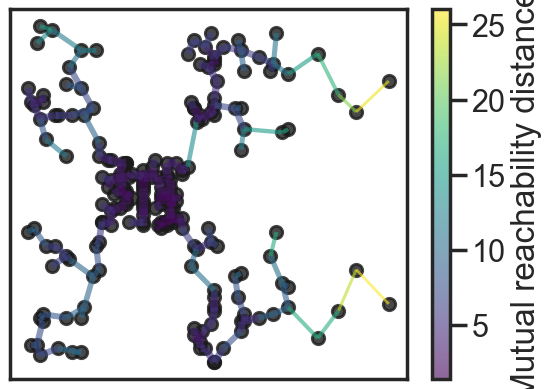

In [9]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

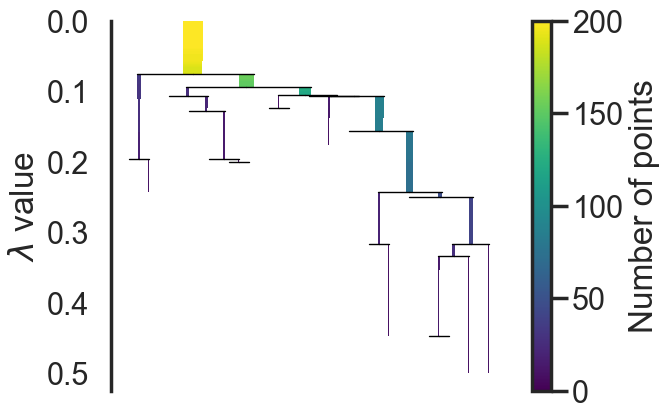

In [10]:
clusterer.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

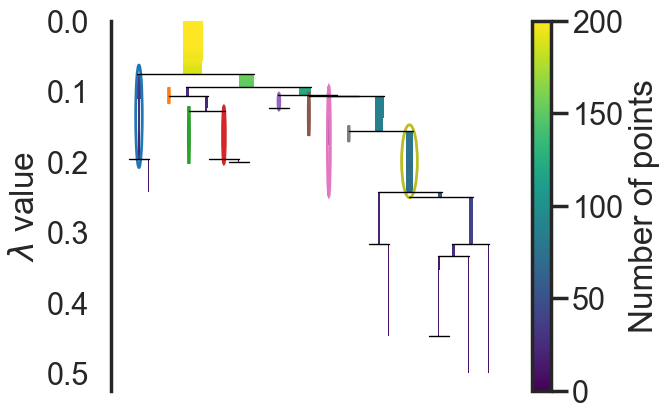

In [11]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())


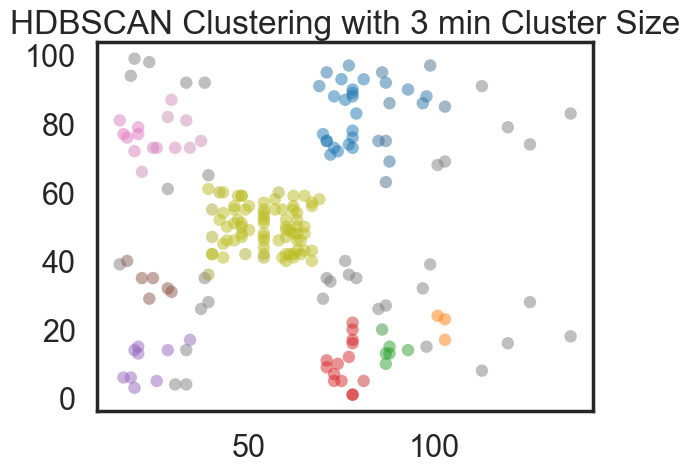

In [12]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering with 3 min Cluster Size")
plt.show()

In [19]:
clusterer2 = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer2.fit(test_data)

HDBSCAN(gen_min_span_tree=True)

<Axes: >

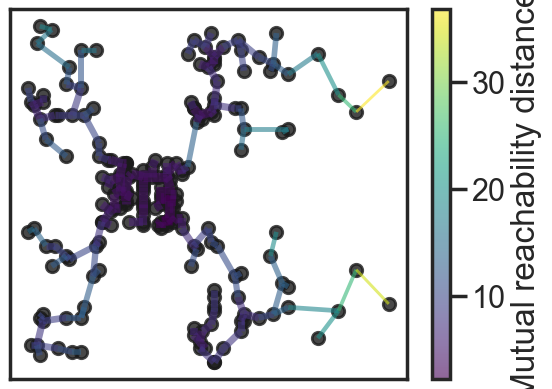

In [20]:
clusterer2.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

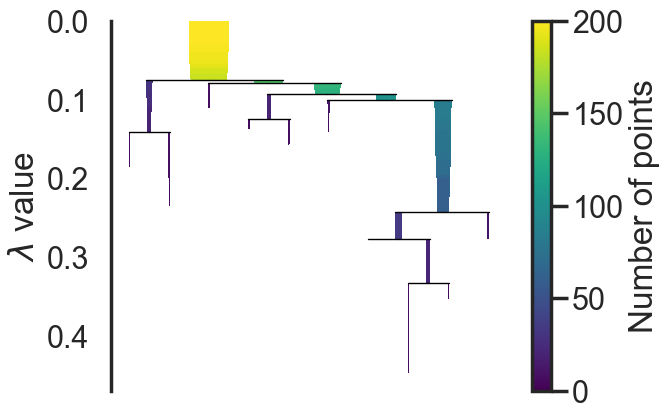

In [21]:
clusterer2.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

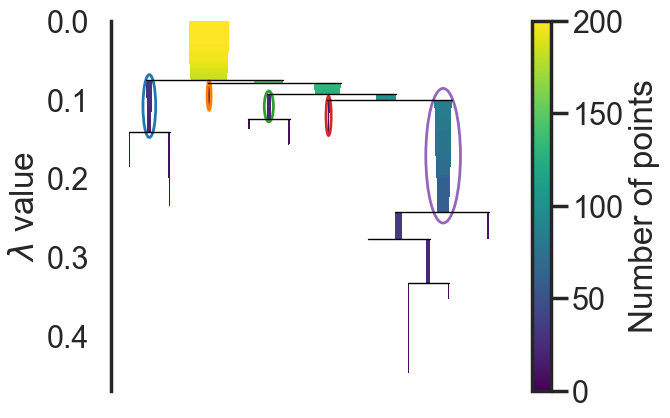

In [22]:
clusterer2.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

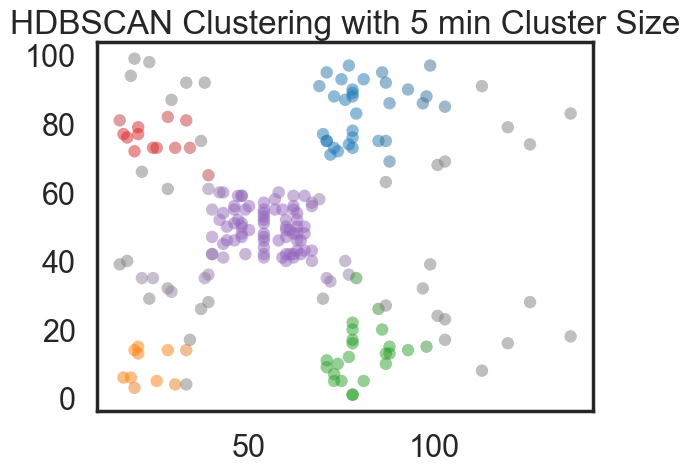

In [23]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer2.labels_, clusterer2.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering with 5 min Cluster Size")
plt.show()

In [24]:
clusterer3 = hdbscan.HDBSCAN(min_cluster_size=9, gen_min_span_tree=True)
clusterer3.fit(test_data)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=9)

<Axes: >

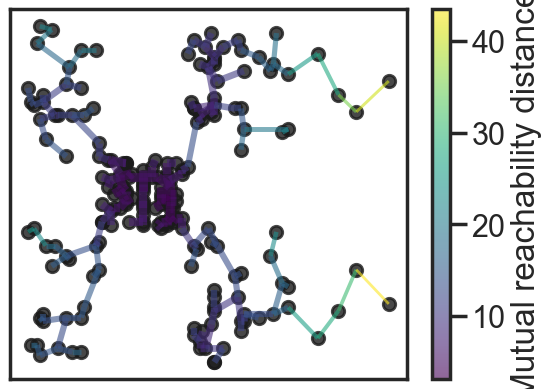

In [25]:
clusterer3.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<Axes: ylabel='$\\lambda$ value'>

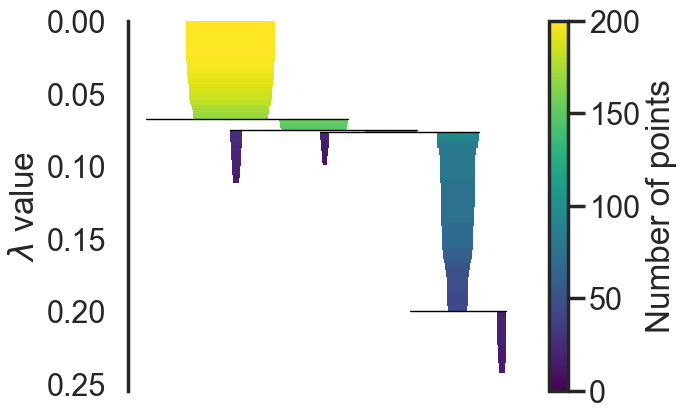

In [28]:
clusterer3.condensed_tree_.plot()

<Axes: ylabel='$\\lambda$ value'>

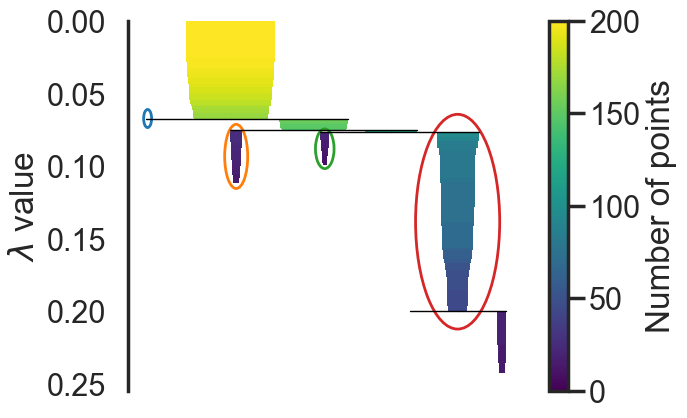

In [29]:
clusterer3.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

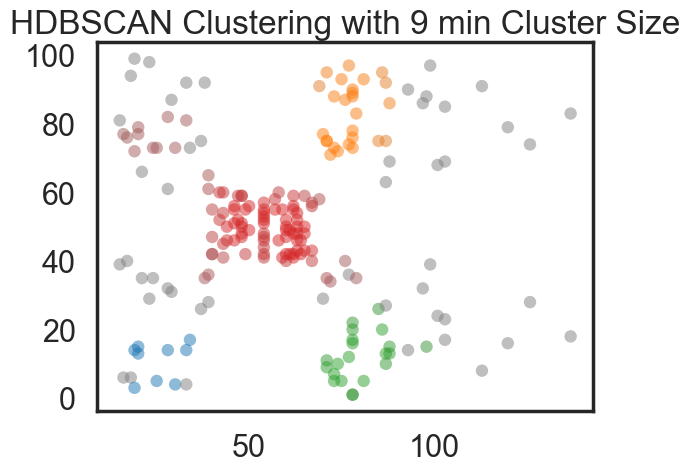

In [30]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer3.labels_, clusterer3.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.title("HDBSCAN Clustering with 9 min Cluster Size")
plt.show()

In [ ]:
HDBSCAN vs OPTIC

In [33]:
X = pd.read_csv('cereal_activity.csv', encoding='Latin-1') 
X.head()

,Unnamed: 0,calories,carbo,sugars
0,0,70,5.0,6
1,1,120,8.0,8
2,2,70,7.0,5
3,3,50,8.0,0
4,4,110,14.0,8


In [34]:
drop_features = ['Unnamed: 0']
X = X.drop(drop_features, axis = 1)

In [35]:
X.ffill(inplace=True)
X.head()

,calories,carbo,sugars
0,70,5.0,6
1,120,8.0,8
2,70,7.0,5
3,50,8.0,0
4,110,14.0,8


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
X_normalized = normalize(X_scaled)


X_normalized = pd.DataFrame(X_normalized)


X_normalized.columns = X.columns

X_normalized.head()

,calories,carbo,sugars
0,-0.643368,-0.762304,-0.070505
1,0.396057,-0.907074,0.142671
2,-0.719455,-0.674814,-0.164349
3,-0.799756,-0.422367,-0.426610
4,0.496303,-0.433148,0.752374


In [40]:
optics_model = OPTICS(min_samples = 10, xi = 0.05, min_cluster_size = 0.05)


optics_model.fit(X_normalized)

OPTICS(min_cluster_size=0.05, min_samples=10)

In [41]:
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 0.5)

In [42]:
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                   core_distances = optics_model.core_distances_,
                                   ordering = optics_model.ordering_, eps = 2)

In [43]:
space = np.arange(len(X_normalized))

In [44]:
reachability = optics_model.reachability_[optics_model.ordering_]

In [45]:
labels = optics_model.labels_[optics_model.ordering_]

In [46]:
print(labels)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1]


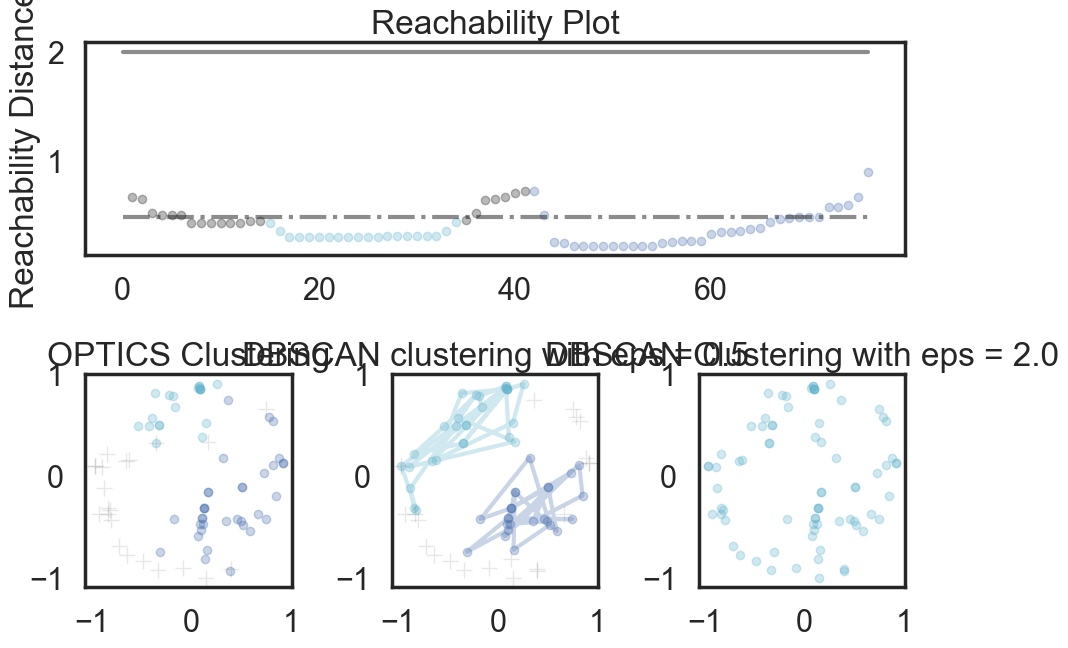

In [48]:
plt.figure(figsize =(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')


colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = X_normalized[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
	
ax2.plot(X_normalized.iloc[optics_model.labels_ == -1, 0],
		X_normalized.iloc[optics_model.labels_ == -1, 1],
	'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering')


colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = X_normalized[labels1 == Class]
	ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
	
ax3.plot(X_normalized.iloc[labels1 == -1, 0],
		X_normalized.iloc[labels1 == -1, 1],
	'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with eps = 0.5')


colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
	Xk = X_normalized.iloc[labels2 == Class]
	ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
		
ax4.plot(X_normalized.iloc[labels2 == -1, 0],
		X_normalized.iloc[labels2 == -1, 1],
	'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with eps = 2.0')


plt.tight_layout()
plt.show()